# Poisson Approximation to Binomial

In this notebook, we explore how the **Poisson distribution can approximate the Binomial** for **rare events with large n and small p**.

We will:

1. Simulate a Binomial distribution with large n and small p  
2. Simulate the corresponding Poisson distribution with λ = n·p  
3. Compare their PMFs  
4. Explore Poisson properties and educational visualizations


# Concept: Poisson as Binomial Approximation

The **Poisson distribution** can be seen as a **limit of the Binomial** when:

$$
n \to \infty, \quad p \to 0, \quad \text{with } \lambda = n \cdot p \text{ fixed}
$$

Then:

$$
\text{Binomial}(n, p) \approx \text{Poisson}(\lambda)
$$

**Why:** For **rare events** (small $p$) and **large number of trials** ($n$), the Binomial PMF simplifies to the Poisson PMF:

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k} \approx \frac{\lambda^k e^{-\lambda}}{k!}, \quad \lambda = n \cdot p
$$

### Classical Example

- Suppose a factory produces **1000 items per day**  
- Each item has a **0.1% defect rate** ($p = 0.001$)  
- Expected number of defects per day:  

$$
\lambda = n \cdot p = 1000 \times 0.001 = 1
$$

- Therefore:  

$$
\text{Binomial}(n=1000, p=0.001) \approx \text{Poisson}(\lambda=1)
$$

This shows how **Poisson can approximate a Binomial** in rare-event scenarios.


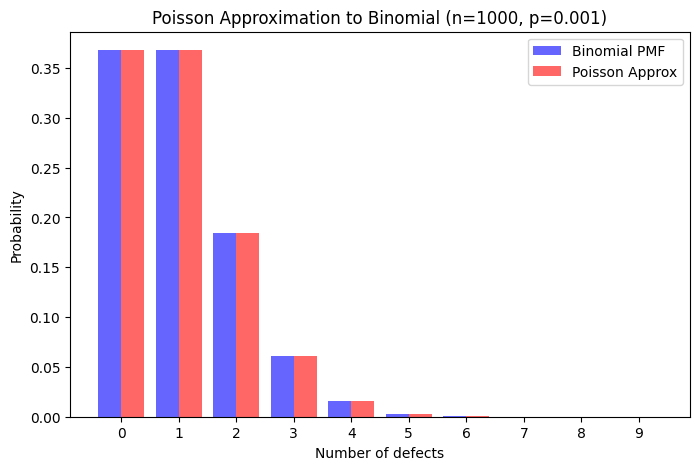

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# Parameters
n = 1000      # number of trials
p = 0.001     # small probability of success
lambda_ = n * p
x = np.arange(0, 10)  # consider k=0..9 defects

# Binomial PMF
binom_pmf = binom.pmf(x, n, p)

# Poisson PMF
poisson_pmf = poisson.pmf(x, lambda_)

# Plot
plt.figure(figsize=(8,5))
plt.bar(x - 0.2, binom_pmf, width=0.4, alpha=0.6, color='blue', label='Binomial PMF')
plt.bar(x + 0.2, poisson_pmf, width=0.4, alpha=0.6, color='red', label='Poisson Approx')
plt.xticks(x)
plt.xlabel('Number of defects')
plt.ylabel('Probability')
plt.title(f'Poisson Approximation to Binomial (n={n}, p={p})')
plt.legend()
plt.show()


# Poisson Properties

- **Mean = Variance = λ**  
- **Skewed right** for small λ, becomes more symmetric as λ increases  
- Can be used to model **rare events per fixed interval**  
- Useful for:
  - Defects in manufacturing  
  - Rare website clicks  
  - Insurance claims  
- Can be **approximated by Normal** for large λ (CLT)


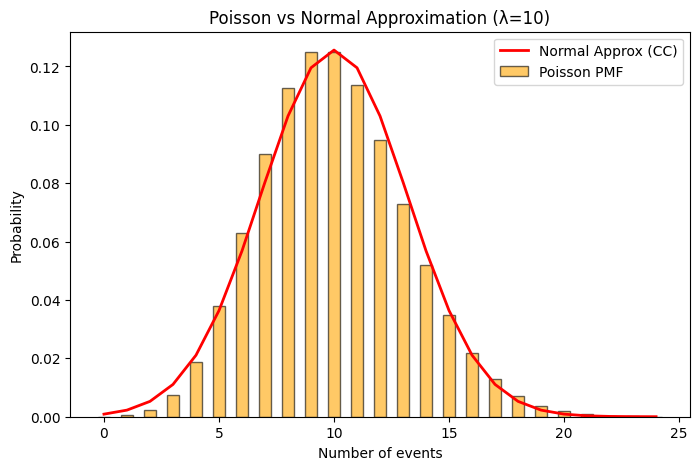

In [2]:
from scipy.stats import norm

lambda_ = 10
x = np.arange(0, 25)
poisson_pmf = poisson.pmf(x, lambda_)

# Normal approximation with continuity correction
normal_cc = norm.cdf(x+0.5, lambda_, np.sqrt(lambda_)) - norm.cdf(x-0.5, lambda_, np.sqrt(lambda_))

plt.figure(figsize=(8,5))
plt.bar(x, poisson_pmf, width=0.5, alpha=0.6, color='orange', edgecolor='black', label='Poisson PMF')
plt.plot(x, normal_cc, 'r-', lw=2, label='Normal Approx (CC)')
plt.title(f'Poisson vs Normal Approximation (λ={lambda_})')
plt.xlabel('Number of events')
plt.ylabel('Probability')
plt.legend()
plt.show()
